In [86]:
import os
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Episodes vs. Generations

In [93]:
def get_experiment_data(exp_name, variables):
    df = pd.DataFrame()
    seeds = []
    algorithms = []
    hyper_vars = []
    enviroments = []
    methods = []
    pops = []
    for v in variables:
        hyper_vars.append([])
    for method in os.listdir(f"./{exp_name}"):
        for alg in os.listdir(f"./{exp_name}/{method}"):
            for f in os.listdir(f"./{exp_name}/{method}/{alg}"):
                if str(f).endswith(".json"):
                    prefix = f[:-5] #removing .json
                    _, en, *var_vals = prefix.split(",")
                    with open(f"./{exp_name}/{method}/{alg}/{f}") as jf:
                        data = json.load(jf)
                        for seed, pop in data.items():
                            seeds.append(seed)
                            pops.append(pop)
                            methods.append(method)
                            algorithms.append(alg)
                            enviroments.append(en)
                            for i, v in enumerate(var_vals):
                                hyper_vars[i].append(v)
    df["seed"] = seeds
    df["pop"] = pops 
    df["criterion"] = methods
    df["alg"] = algorithms
    df["env"] = enviroments                    
    for i, v in enumerate(variables):
        df[v] = hyper_vars[i]
    return df

def pop_mean(pop):
    fitness = 0
    for ind in pop:
        fitness += ind[0][0]
    return fitness/len(pop)

def pop_std(pop):
    fitness = []
    for ind in pop:
        fitness += ind[0]
    return np.array(fitness).std()


def plot_ep_gen(df):
    grps = df.groupby(by=["eps","gens"]).mean().reset_index(["eps","gens"])
    g = sns.FacetGrid(data=grps, col="eps")
    g.map(sns.lineplot, "gens","mean_fit")
    g = sns.FacetGrid(data=grps, col="eps")
    g.map(sns.lineplot, "gens","std_fit")
    g = sns.FacetGrid(data=grps, col="gens")
    g.map(sns.lineplot, "eps","mean_fit")
    g = sns.FacetGrid(data=grps, col="gens")
    g.map(sns.lineplot, "eps","std_fit")


In [53]:
edf = get_experiment_data("ep_gen", ["gens", "eps"])
edf["mean_fit"] = edf["pop"].map(pop_mean)
edf["std_fit"] = edf["pop"].map(pop_std)
edf["gens"]=edf["gens"].map(lambda x: int(x[1:]))
edf["eps"]=edf["eps"].map(lambda x: int(x[1:]))
diffs = edf.groupby("alg").get_group("diff")

,seed,pop,criterion,alg,env,gens,eps,mean_fit,std_fit
0,102,"[[[105.0], [0.0922932413717111, 0.512993649432...",fitness,diff,cartpole,7,6,235.780952,109.173145
1,101,"[[[108.06666666666666], [0.0709379588564237, 0...",fitness,diff,cartpole,7,6,146.647619,47.699798
2,103,"[[[77.33333333333333], [-0.06861129154761633, ...",fitness,diff,cartpole,7,6,140.323810,111.412053
3,103,"[[[500.0], [0.004617205898587903, -0.005018733...",fitness,diff,cartpole,7,5,252.428571,184.873368
4,101,"[[[167.0], [0.07037020598848662, 0.50217797311...",fitness,diff,cartpole,7,5,170.942857,115.468934
...,...,...,...,...,...,...,...,...,...
247,102,"[[[500.0], [0.003039379953406751, 0.0107799986...",fitness,lambda,cartpole,30,4,500.000000,0.000000
248,103,"[[[500.0], [-0.0015567720402032137, 0.02339361...",fitness,lambda,cartpole,30,4,500.000000,0.000000
249,103,"[[[500.0], [0.006187447191526493, -0.018898052...",fitness,lambda,cartpole,20,5,500.000000,0.000000
250,102,"[[[500.0], [0.0031643762486055493, -0.02088401...",fitness,lambda,cartpole,20,5,493.848889,33.124747


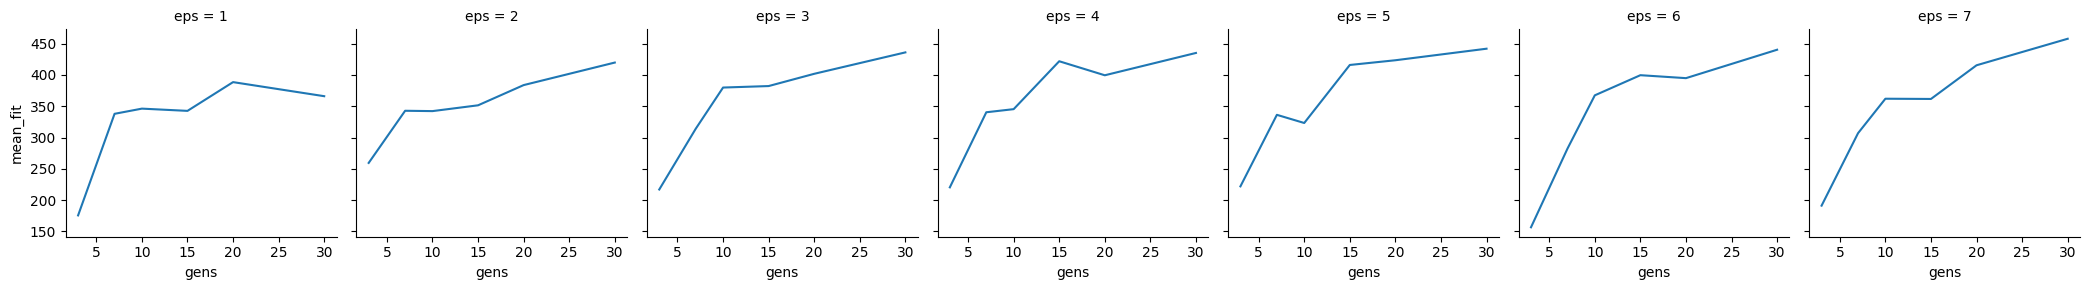

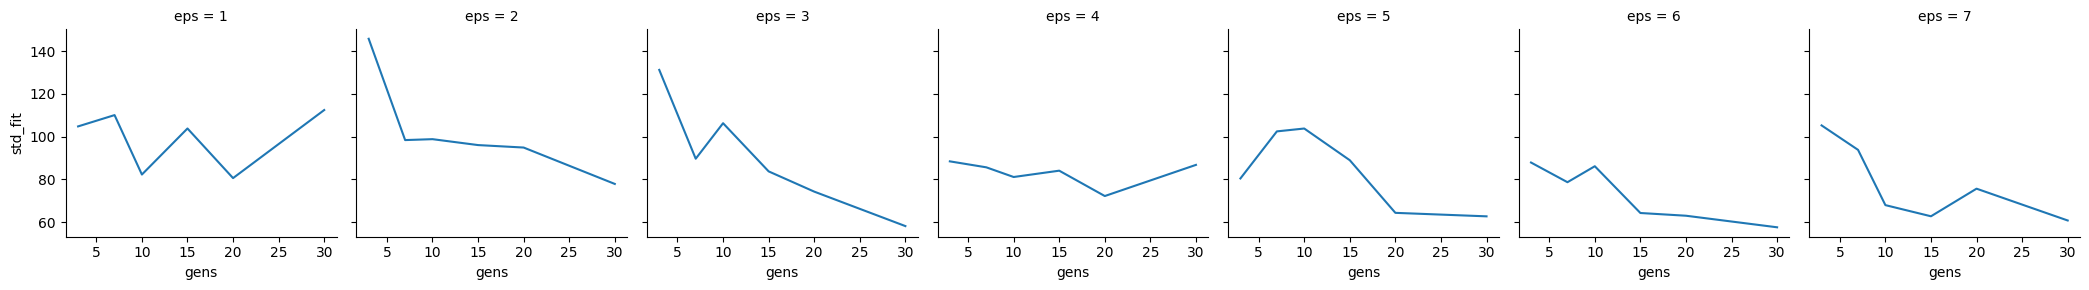

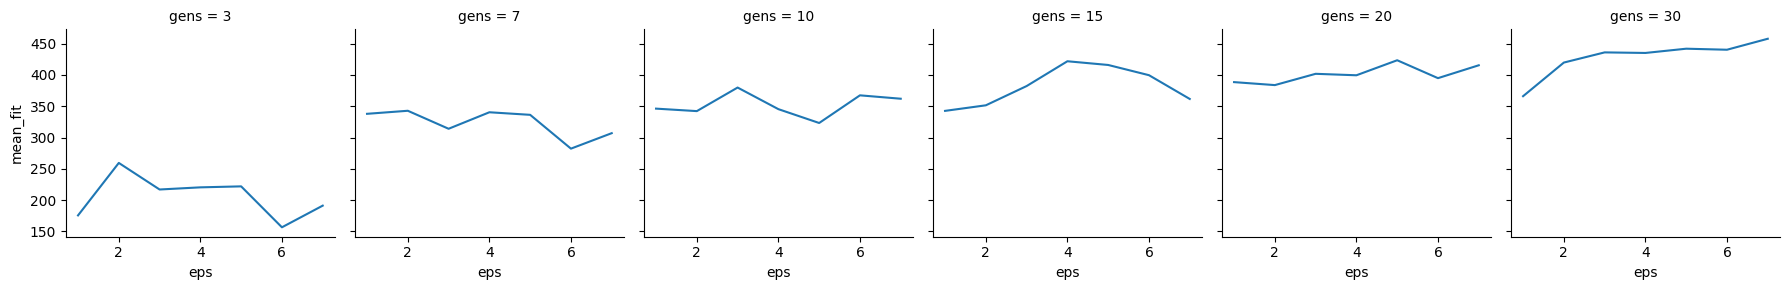

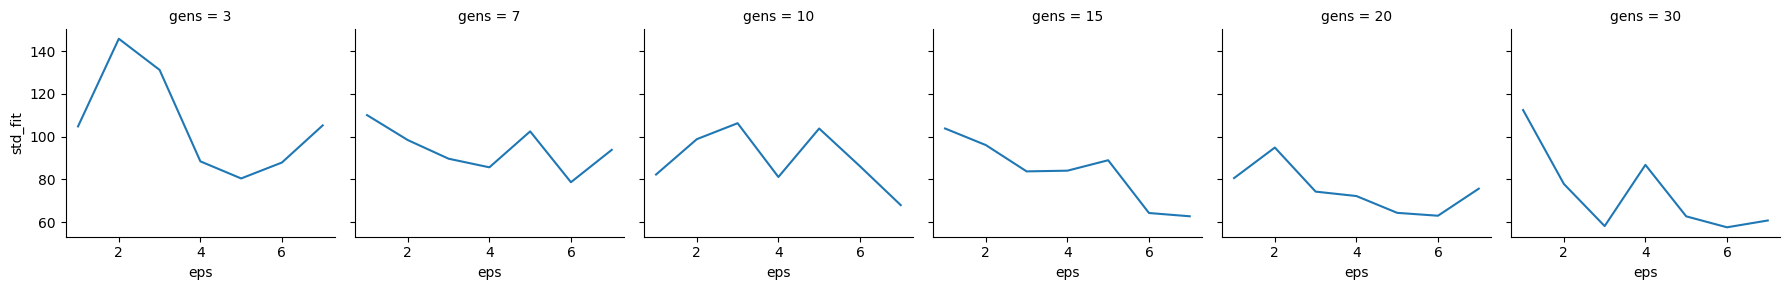

In [94]:
plot_ep_gen(diffs)